## Question 1

In [59]:
import numpy as np
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.vq import vq, kmeans, whiten

In [60]:
cur_dir = os.path.dirname('__file__') #<-- absolute dir the script is in
path_to_data = os.path.join(cur_dir, "eurojob.csv")
df = pd.read_csv(path_to_data)
labels =['Belgium  ', 'Denmark ', 'France', 'W. Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'United Kingdom', 'Austria','Finland', 'Greece', 'Norway','Portugal', 'Spain', 'Sweden', 'Switzerland','Turkey', 'Bulgaria', 'Czechoslovakia','E. Germany', 'Hungary', 'Poland','Rumania', 'USSR', 'Yugoslavia'];


In [61]:
print(df)

           Country   Agr  Min   Man   PS   Con    SI   Fin   SPS   TC
0          Belgium   3.3  0.9  27.6  0.9   8.2  19.1   6.2  26.6  7.2
1          Denmark   9.2  0.1  21.8  0.6   8.3  14.6   6.5  32.2  7.1
2           France  10.8  0.8  27.5  0.9   8.9  16.8   6.0  22.6  5.7
3       W. Germany   6.7  1.3  35.8  0.9   7.3  14.4   5.0  22.3  6.1
4          Ireland  23.2  1.0  20.7  1.3   7.5  16.8   2.8  20.8  6.1
5            Italy  15.9  0.6  27.6  0.5  10.0  18.1   1.6  20.1  5.7
6       Luxembourg   7.7  3.1  30.8  0.8   9.2  18.5   4.6  19.2  6.2
7      Netherlands   6.3  0.1  22.5  1.0   9.9  18.0   6.8  28.5  6.8
8   United Kingdom   2.7  1.4  30.2  1.4   6.9  16.9   5.7  28.3  6.4
9          Austria  12.7  1.1  30.2  1.4   9.0  16.8   4.9  16.8  7.0
10         Finland  13.0  0.4  25.9  1.3   7.4  14.7   5.5  24.3  7.6
11          Greece  41.4  0.6  17.6  0.6   8.1  11.5   2.4  11.0  6.7
12          Norway   9.0  0.5  22.4  0.8   8.6  16.9   4.7  27.6  9.4
13        Portugal  

In [62]:
df=df.drop(df.columns[0], axis=1)

In [63]:
print(df.shape)

(26, 9)


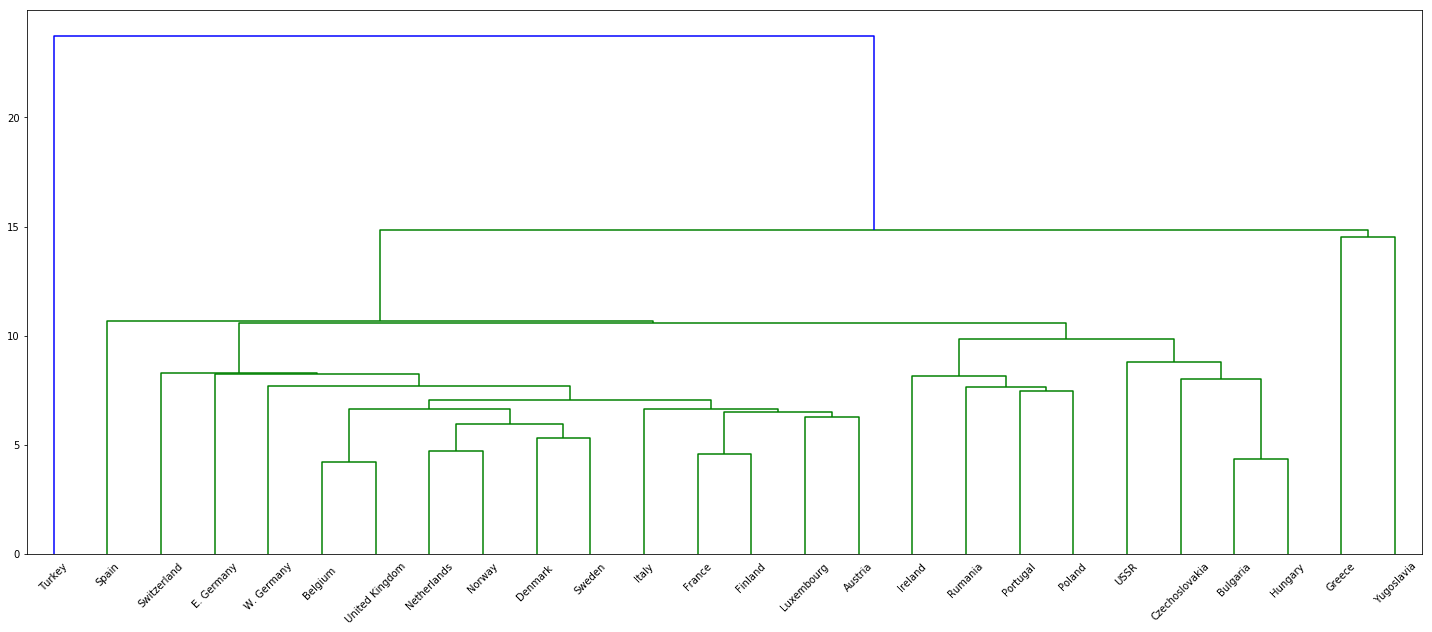

In [64]:
Z = linkage(df, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,  labels=labels)
plt.show()

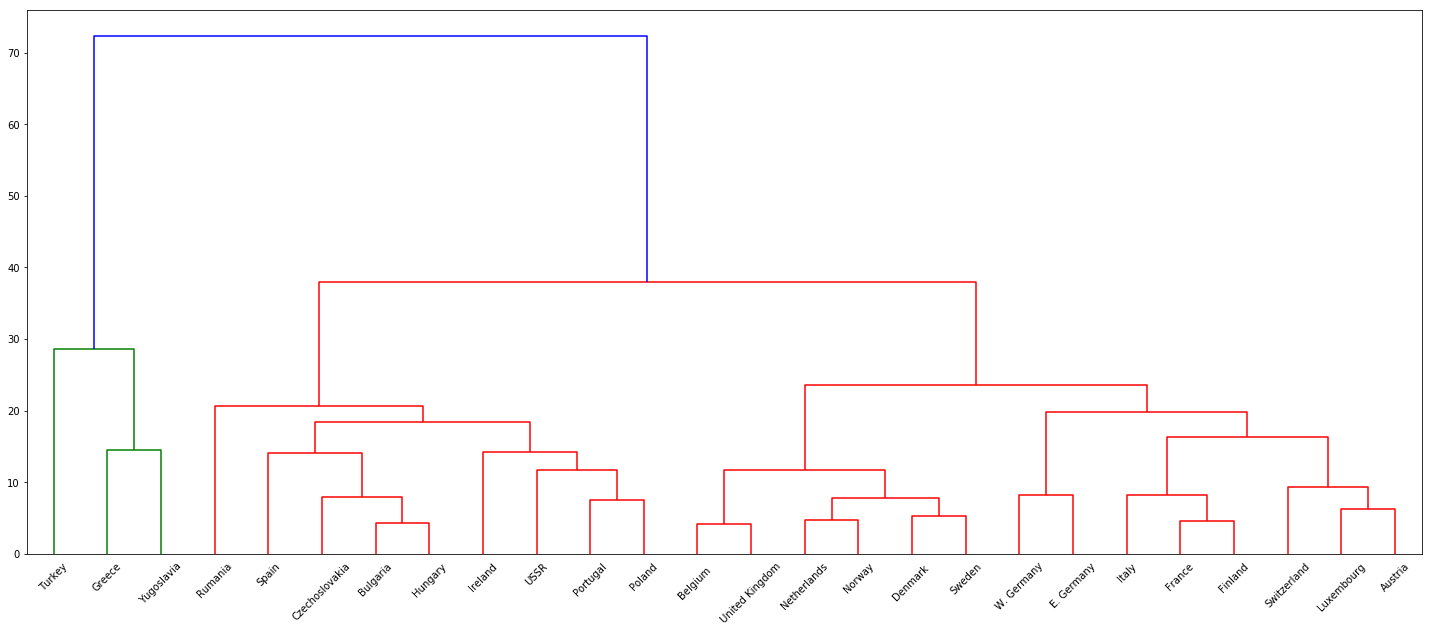

In [65]:
Z = linkage(df, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,  labels=labels)
plt.show()

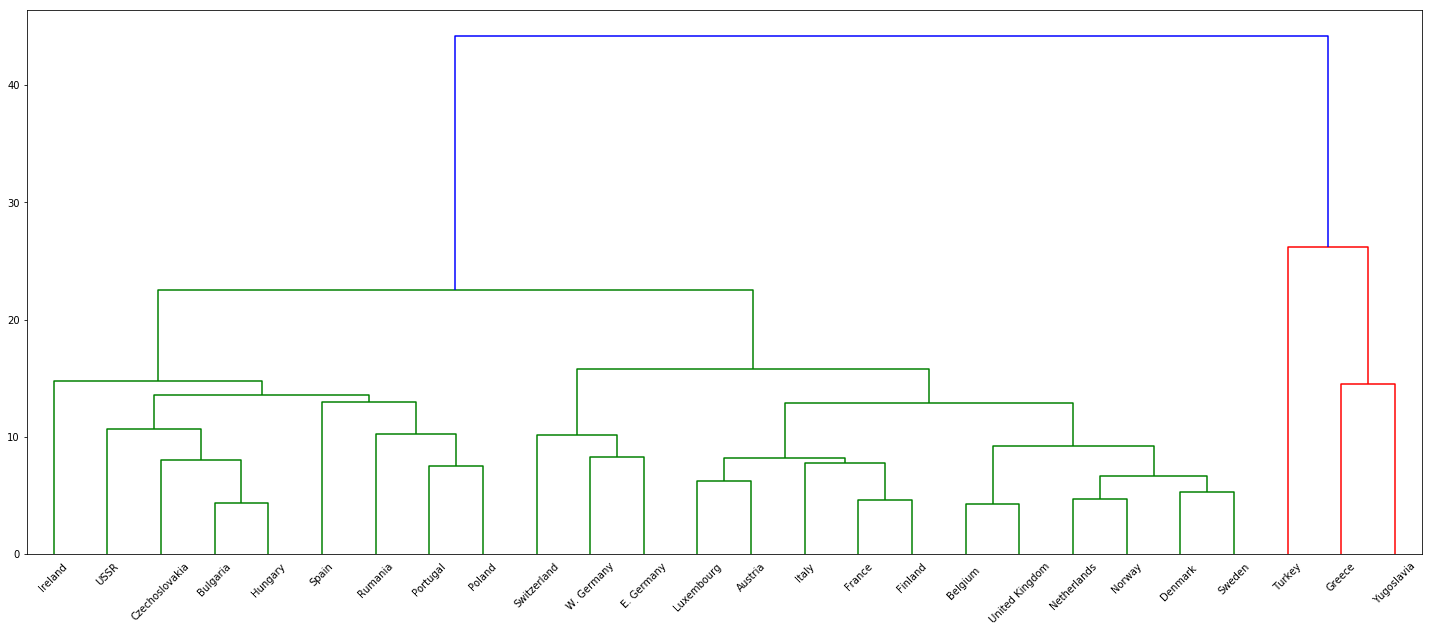

In [66]:
Z = linkage(df, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,  labels=labels)
plt.show()

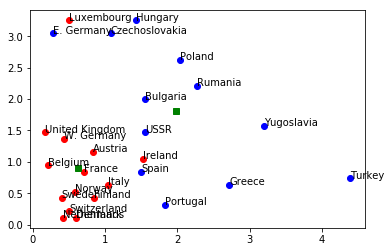

In [67]:
# computing K-Means with K = 2 (2 clusters)
whitened = whiten(df)
codebook, distortion = kmeans(whitened, 2)
idx,_ = vq(whitened,codebook)
plt.plot(whitened[idx==0,0],whitened[idx==0,1],'ob')
plt.plot(whitened[idx==1,0],whitened[idx==1,1],'or')

plt.plot(codebook[:,0],codebook[:,1],'sg')
for x, y, name in zip(whitened[:,0], whitened[:,1], labels):
    plt.text(x, y, name)
plt.show()

In [68]:
#the sum of distance between each observation and its centroid (k=2)
print(distortion)

2.36239010148


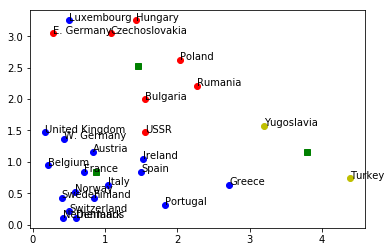

In [69]:
# computing K-Means with K = 3 (3 clusters)
whitened = whiten(df)
codebook, distortion = kmeans(whitened, 3)
idx,_ = vq(whitened,codebook)
plt.plot(whitened[idx==0,0],whitened[idx==0,1],'ob')
plt.plot(whitened[idx==1,0],whitened[idx==1,1],'or')
plt.plot(whitened[idx==2,0],whitened[idx==2,1],'oy')


plt.plot(codebook[:,0],codebook[:,1],'sg')
for x, y, name in zip(whitened[:,0], whitened[:,1], labels):
    plt.text(x, y, name)
plt.show()

In [70]:
#the sum of distance between each observation and its centroid (k=3)
print(distortion)

2.08828726579


In [71]:
# computing K-Means with K = 4 (4 clusters)
list_distortions = []
for i in range(1,27):
    whitened = whiten(df)
    codebook, distortion = kmeans(whitened, i)
    idx,_ = vq(whitened,codebook)
    #the sum of distance between each observation and its centroid (k=2)
    list_distortions.append(distortion)
    print(str(distortion) + '   ' + 'k=' + str(i))

2.79425331145   k=1
2.36239010148   k=2
2.08828726579   k=3
1.89847648487   k=4
1.73219548449   k=5
1.61445701851   k=6
1.49383813459   k=7
1.37765505864   k=8
1.25318371172   k=9
1.17164207307   k=10
1.13084095502   k=11
0.954393497306   k=12
0.897562781737   k=13
0.821501499875   k=14
0.70443318762   k=15
0.661233819974   k=16
0.621557955344   k=17
0.51598234938   k=18
0.455360803927   k=19
0.376956228955   k=20
0.298827277411   k=21
0.226516129178   k=22
0.174469911339   k=23
0.116791611846   k=24
0.0445168681225   k=25
1.29682610803e-08   k=26


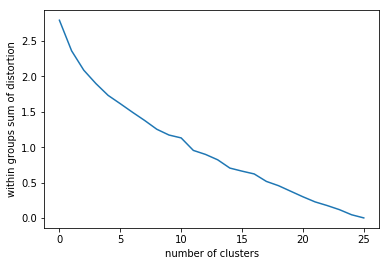

In [72]:
#ploting costing fucntion over K 
plt.plot(list_distortions)
plt.ylabel('within groups sum of distortion')
plt.xlabel('number of clusters')
plt.show()